In [1]:
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sb
import pandas as pd

## Reading Some Graphs

In [2]:
graph1 = nx.read_edgelist('./facebook_combined.txt', comments="#", delimiter=" ", create_using=nx.Graph())
graph2 = nx.read_edgelist('./CA-GrQc.txt', comments='#', delimiter='\t', create_using=nx.Graph())
graph3 = nx.read_edgelist('./CA-HepTh.txt', comments='#', delimiter='\t', create_using=nx.Graph())

In [3]:
graph1.number_of_nodes(), graph2.number_of_nodes(), graph3.number_of_nodes()

(4039, 5242, 9877)

## Node Degree

The node degree corresponds to the amount of neighbors that is linked to a node. It varies according to the two following properties:
* Undirected Graph: Is the amount of edges that connect a node $k_{i}$ to its neighbors.
* Directed Graph: Is the amount of incoming and outgoing edges of a Node. Thus, the degree of a node $k_i$ is $k_{i}^{out}+k_{i}^{in}$.

To retrieve the degree of each node is quite simple using networkx, the only thing necessary is to call the builtin function `networkx.degree()` in the library. The function receives as argument a graph and as a result returns a dictionary containing the degree of each node.

In [4]:
degreeGraph1 = pd.DataFrame(pd.Series(nx.degree(graph1)), columns=["Degree"])
degreeGraph2 = pd.DataFrame(pd.Series(nx.degree(graph2)), columns=["Degree"])
degreeGraph3 = pd.DataFrame(pd.Series(nx.degree(graph3)), columns=["Degree"])

The degree distribution of a node denotes the number of k-degree nodes in a network. The easiest way of showing the distribution is plotting the histogram for the degrees:

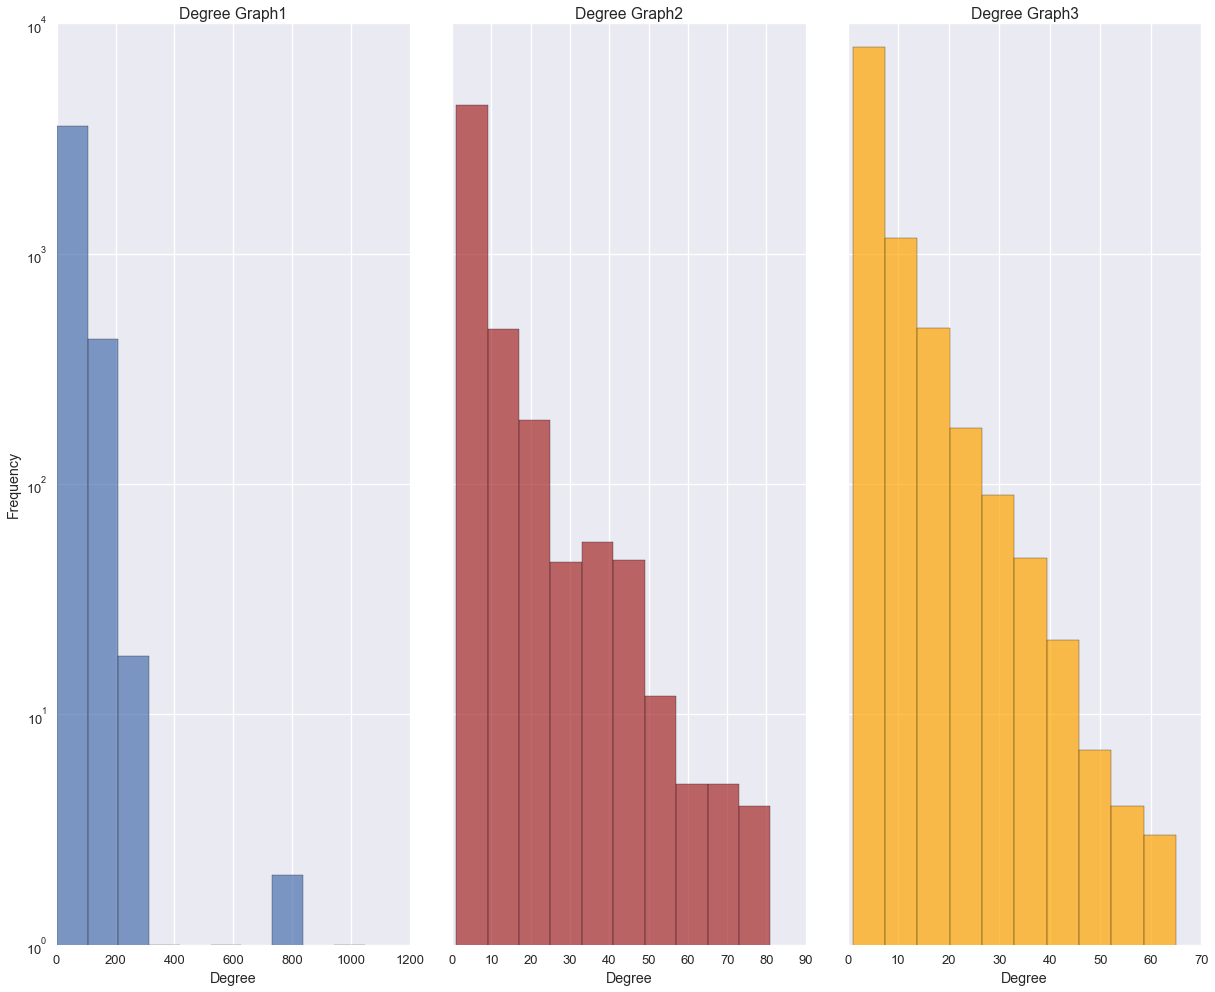

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
plt.style.use('seaborn-talk')
plt.tight_layout(pad = -18, h_pad = 1 , w_pad=2)
ax[0].hist(degreeGraph1['Degree'], alpha=0.7, normed=False, stacked=True, log=True)
ax[0].set_title('Degree Graph1')
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Frequency')
ax[1].hist(degreeGraph2['Degree'], alpha=0.7, normed=False, stacked=True, log=True, color='brown')
ax[1].set_title('Degree Graph2')
ax[1].set_xlabel('Degree')
ax[2].hist(degreeGraph3['Degree'], alpha=0.7, normed=False, stacked=True, log=True, color='orange')
ax[2].set_title('Degree Graph3')
ax[2].set_xlabel('Degree')

As we can see above, the node distribution for the Graph1 shows that the higher percentage of nodes have a degree in the range $\left[1, 100\right]$. This means that most of the nodes in the graph have a degree of at most $100$.
In contrast to the First Graph, the degree distribution for the second and third graph shows that most of the nodes have a degree in the range of $\left[1, 10\right]$.

As we can visualize, the degree distribution for the second and third graph are similar, since they are collaboration network from the arxiv, which implies that the same pattern occurs in both networks.

## Clustering Coefficients

The clustering coefficient captures the degree to which the neighbors of a given node link to each other. In other words, for unweighted graphs, the degree of a node $\textit{u}$ is the fraction of possible triangles through that node that exist. In `networkx`, the following equations is used to compute the clustering coefficients:
<center>$c_{u} = \frac{2T(u)}{deg(u)(deg(u) - 1)}$,</center>
where $T(u)$ is the number of triangles through node *u* and $deg(u)$ is the degree of $u$.

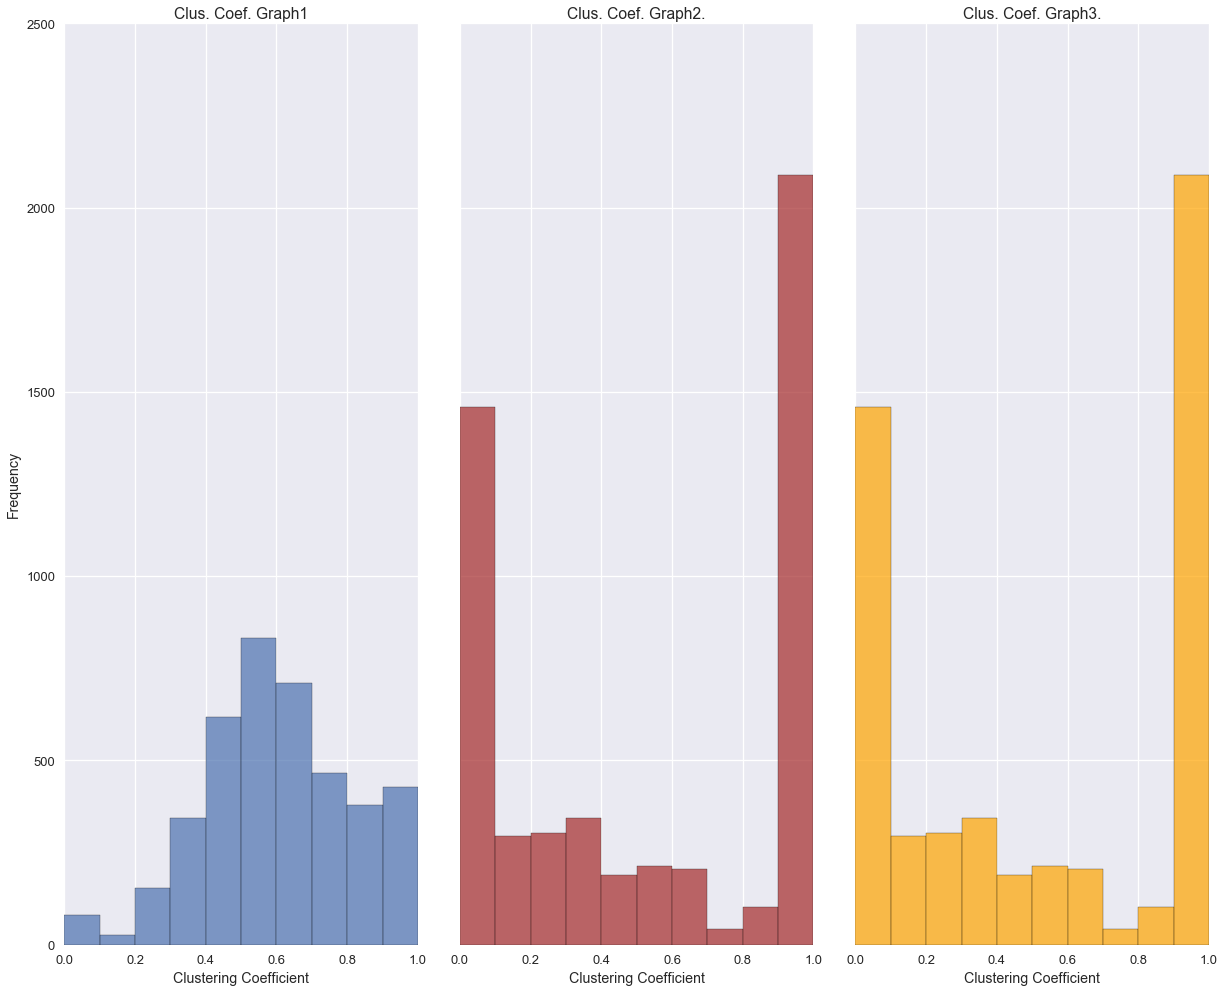

In [71]:
clusteringGraph1 = nx.clustering(graph1)
clusteringGraph2 = nx.clustering(graph2)
clusteringGraph3 = nx.clustering(graph3)
clusteringGraph1 = pd.DataFrame(pd.Series(clusteringGraph1), 
                            columns=["Clust.Coeff."])
clusteringGraph2 = pd.DataFrame(pd.Series(clusteringGraph2), 
                            columns=["Clust.Coeff."])
clusteringGraph3 = pd.DataFrame(pd.Series(clusteringGraph3), 
                            columns=["Clust.Coeff."])
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
plt.style.use('seaborn-talk')
plt.tight_layout(pad = -18, h_pad = 1 , w_pad=2)
ax[0].hist(clusteringGraph1['Clust.Coeff.'], normed=False, alpha=0.7, log=False)
ax[0].set_title('Clus. Coef. Graph1')
ax[0].set_xlabel('Clustering Coefficient')
ax[0].set_ylabel('Frequency')
ax[1].hist(clusteringGraph2['Clust.Coeff.'], normed=False, alpha=0.7, log=False,  color='brown')
ax[1].set_title('Clus. Coef. Graph2.')
ax[1].set_xlabel('Clustering Coefficient')
ax[2].hist(clusteringGraph2['Clust.Coeff.'], normed=False, alpha=0.7, log=False,  color='orange')
ax[2].set_title('Clus. Coef. Graph3.')
ax[2].set_xlabel('Clustering Coefficient')

The clustering coefficients tells the probability that two neighbors of a node link to each other. Therefore, for the first graph, the frequency seems to follow a gaussian distribution curve with median of $0.55$. It's also possible to infer that for the majority of nodes, the probability of two independent nodes link to each other is above $50%$.

Just like the previous metric, the second and third graph are similar, with a higher probability of $\left[0.9, 1.\right]$ of chance for more than 2000 thousand of the nodes been linked with each other.

## Number of Connected Components and Their Sizes

In [9]:
number_components_graph1 = nx.number_connected_components(graph1)
number_components_graph2 = nx.number_connected_components(graph2)
number_components_graph3 = nx.number_connected_components(graph3)
print("Number Components Graph1:", number_components_graph1)
print("Number Components Graph2:", number_components_graph2)
print("Number Components Graph3:", number_components_graph3)

Number Components Graph1: 1
Number Components Graph2: 355
Number Components Graph3: 429


In [49]:
con_comp_graph1 = list(nx.connected_component_subgraphs(graph1))
con_comp_graph2 = list(nx.connected_component_subgraphs(graph2))
con_comp_graph3 = list(nx.connected_component_subgraphs(graph3))
scon_comp_graph1 = [nx.number_of_nodes(con_comp_graph1[x])  for x in range(0, len(con_comp_graph1), 1)]
scon_comp_graph2 = [nx.number_of_nodes(con_comp_graph2[x])  for x in range(0, len(con_comp_graph2), 1)]
scon_comp_graph3 = [nx.number_of_nodes(con_comp_graph3[x])  for x in range(0, len(con_comp_graph3), 1)]

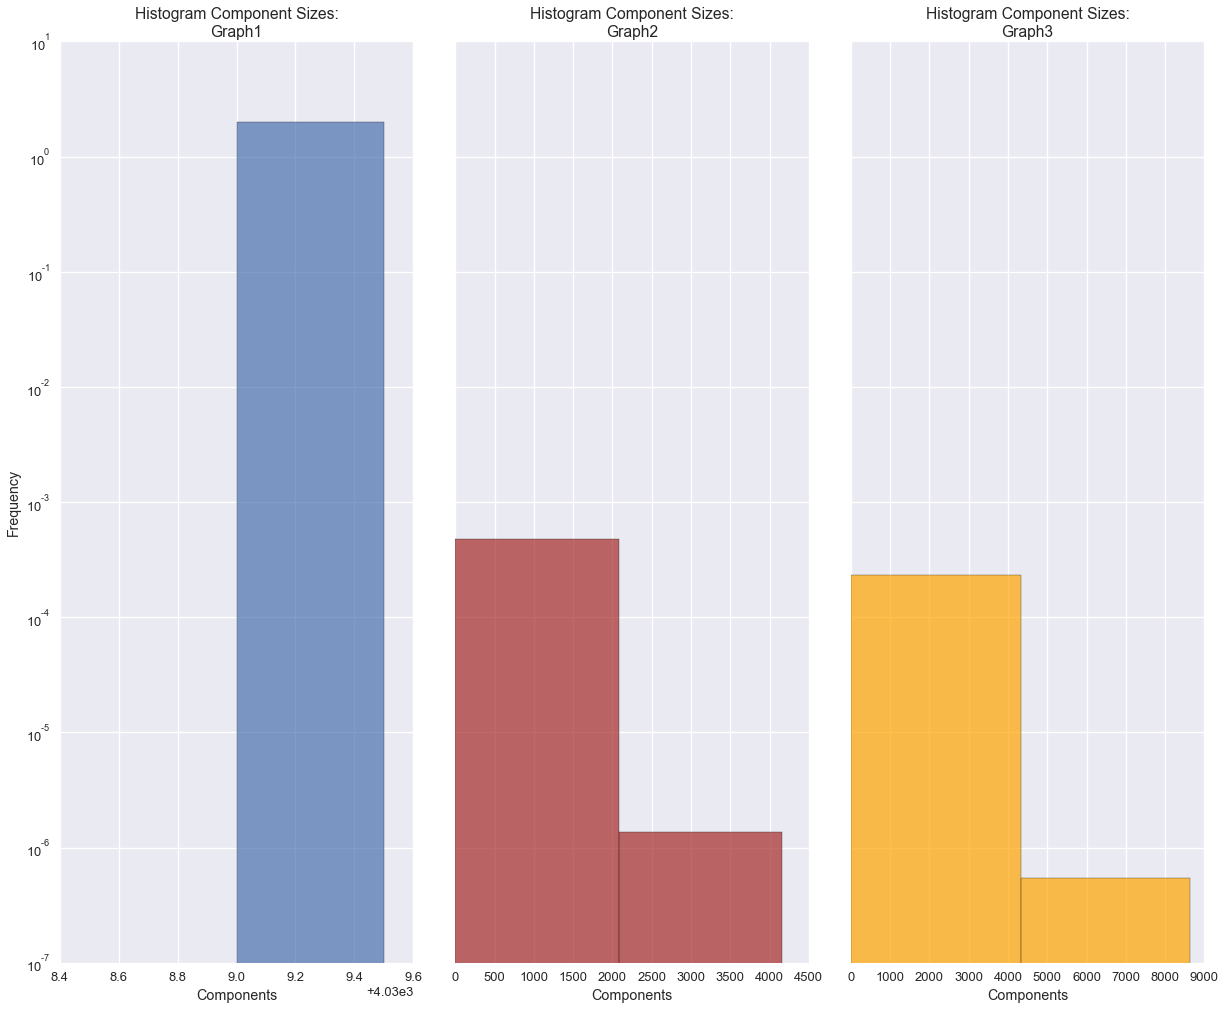

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
plt.style.use('seaborn-talk')
plt.tight_layout(pad = -18, h_pad = 1 , w_pad=2)
ax[0].hist(scon_comp_graph1, normed=True, bins=2, stacked=True, log=True, alpha=0.7)
ax[0].set_title('Histogram Component Sizes:\nGraph1')
ax[0].set_xlabel('Components')
ax[0].set_ylabel('Frequency')
ax[1].hist(scon_comp_graph2, normed=True, bins=2, stacked=True, log=True, alpha=0.7, color='brown')
ax[1].set_title('Histogram Component Sizes:\nGraph2')
ax[1].set_xlabel('Components')
ax[2].hist(scon_comp_graph3, normed=True, bins=2, stacked=True, log=True, alpha=0.7, color='orange')
ax[2].set_title('Histogram Component Sizes:\nGraph3')
ax[2].set_xlabel('Components')

## Betweenness Centrality

In [11]:
betweenness_centrality_graph1 = nx.betweenness_centrality(graph1)
betweenness_centrality_graph2 = nx.betweenness_centrality(graph2)
betweenness_centrality_graph3 = nx.betweenness_centrality(graph3)
betweennessGraph1 = pd.DataFrame(pd.Series(betweenness_centrality_graph1), 
                                 columns=["Bet_Centrality"])
betweennessGraph2 = pd.DataFrame(pd.Series(betweenness_centrality_graph2),
                                 columns=["Bet_Centrality"])
betweennessGraph3 = pd.DataFrame(pd.Series(betweenness_centrality_graph3),
                                 columns=["Bet_Centrality"])

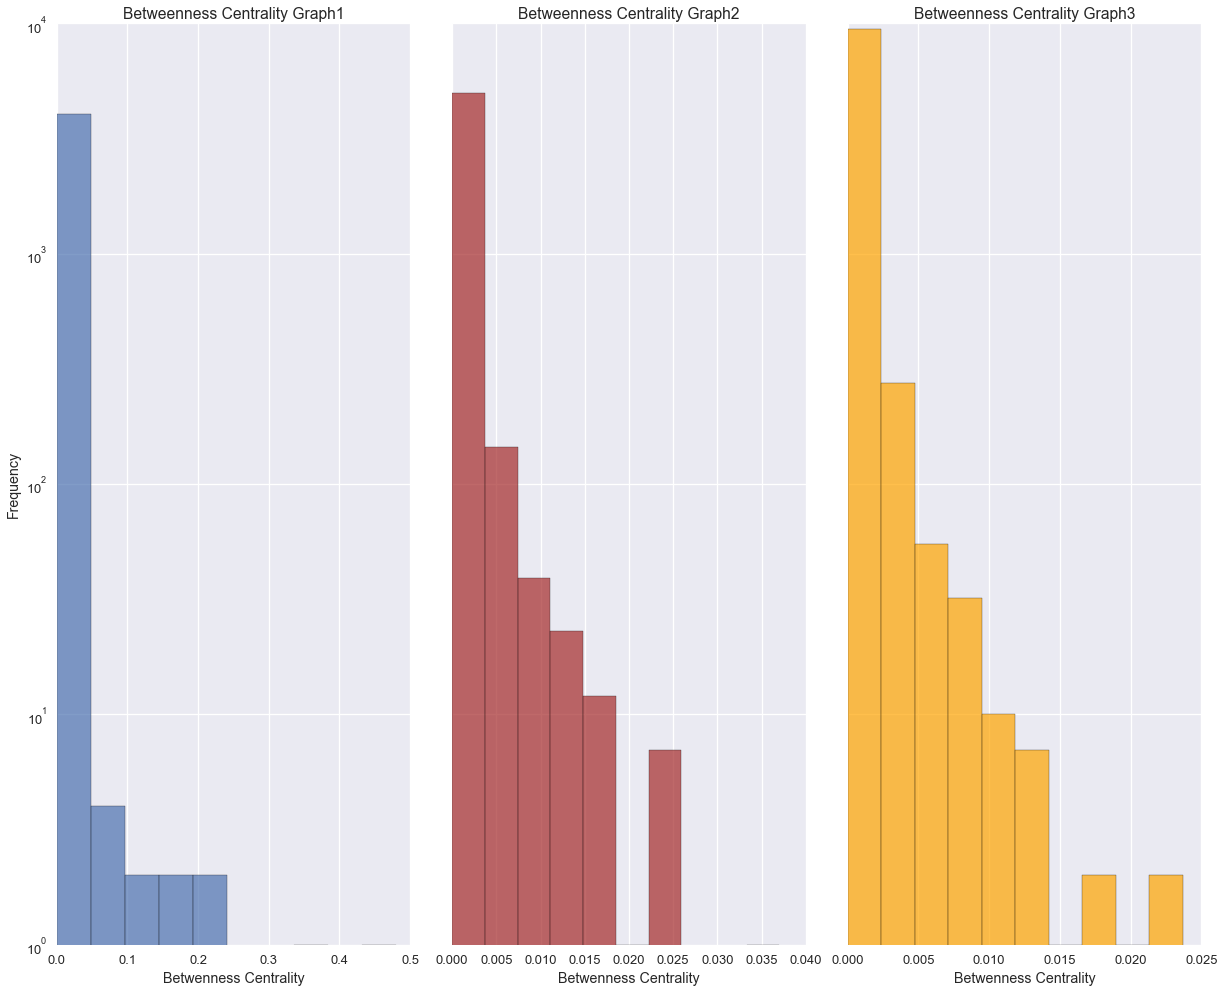

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
plt.style.use('seaborn-talk')
plt.tight_layout(pad = -18, h_pad = 1 , w_pad=2)
ax[0].hist(betweennessGraph1['Bet_Centrality'], normed=False, alpha=0.7, log=True)
ax[0].set_title('Betweenness Centrality Graph1')
ax[0].set_xlabel('Betwenness Centrality')
ax[0].set_ylabel('Frequency')
ax[1].hist(betweennessGraph2['Bet_Centrality'], normed=False, alpha=0.7, log=True, color='brown')
ax[1].set_title('Betweenness Centrality Graph2')
ax[1].set_xlabel('Betwenness Centrality')
ax[2].hist(betweennessGraph3['Bet_Centrality'], normed=False, alpha=0.7, log=True, color='orange')
ax[2].set_title('Betweenness Centrality Graph3')
ax[2].set_xlabel('Betwenness Centrality')

## Closenness Centrality

In [13]:
closenness_centrality_graph1 = nx.closeness_centrality(graph1)
closenness_centrality_graph2 = nx.closeness_centrality(graph2)
closenness_centrality_graph3 = nx.closeness_centrality(graph3)
closennessGraph1 = pd.DataFrame(pd.Series(closenness_centrality_graph1), columns=["Clos_Centrality"])
closennessGraph2 = pd.DataFrame(pd.Series(closenness_centrality_graph2), columns=["Clos_Centrality"])
closennessGraph3 = pd.DataFrame(pd.Series(closenness_centrality_graph3), columns=["Clos_Centrality"])

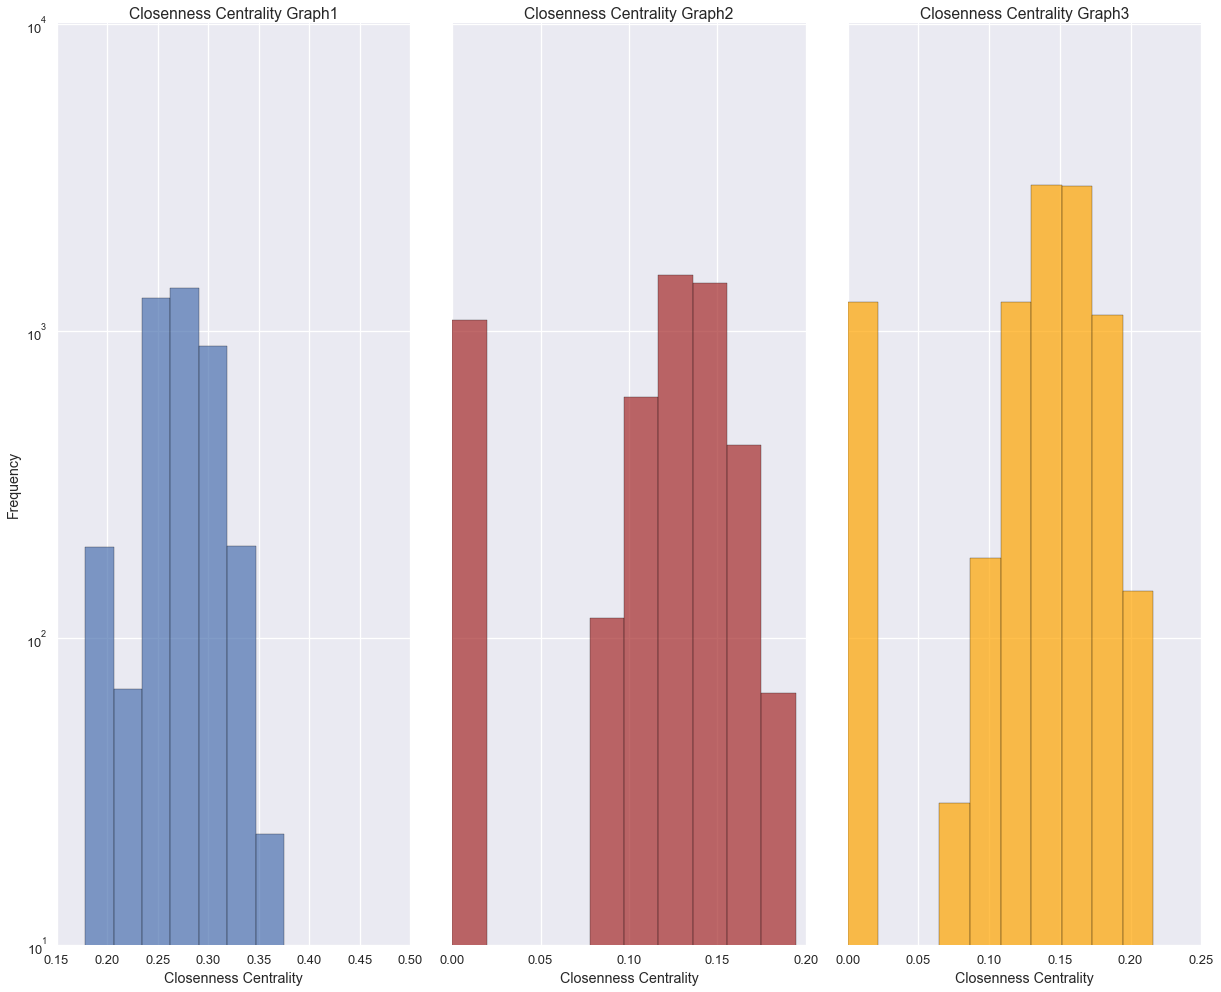

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
plt.style.use('seaborn-talk')
plt.tight_layout(pad = -18, h_pad = 1 , w_pad=2)
ax[0].hist(closennessGraph1['Clos_Centrality'], normed=False, alpha=0.7, log=True)
ax[0].set_title('Closenness Centrality Graph1')
ax[0].set_xlabel('Closenness Centrality')
ax[0].set_ylabel('Frequency')
ax[1].hist(closennessGraph2['Clos_Centrality'], normed=False, alpha=0.7, log=True, color='brown')
ax[1].set_title('Closenness Centrality Graph2')
ax[1].set_xlabel('Closenness Centrality')
ax[2].hist(closennessGraph3['Clos_Centrality'], normed=False, alpha=0.7, log=True, color='orange')
ax[2].set_title('Closenness Centrality Graph3')
ax[2].set_xlabel('Closenness Centrality')


## Diameter

In [100]:
diameter_graph1 = list()
for subgraph in con_comp_graph1:
    diameter_graph1.append(nx.diameter(subgraph))
diameter_graph2 = list()
for subgraph in con_comp_graph2:
    diameter_graph2.append(nx.diameter(subgraph))
diameter_graph3 = list()
for subgraph in con_comp_graph3:
    diameter_graph3.append(nx.diameter(subgraph))

In [101]:
print("Maximum diameter for Graph1: ", len(diameter_graph1))
print("Maximum diameter for Graph2: ", len(diameter_graph2))
print("Maximum diameter for Graph2: ", len(diameter_graph3))

Maximum diameter for Graph1:  1
Maximum diameter for Graph2:  355
Maximum diameter for Graph2:  429


## Correlation Using Pearson and Spearman

In [17]:
pd_correlation = pd.DataFrame({'Degree G1':degreeGraph1.sort_values(by="Degree", ascending=False)['Degree'].values[0:1000],
                               'Degree G2':degreeGraph2.sort_values(by="Degree", ascending=False)['Degree'].values[0:1000],
                               'Degree G3':degreeGraph3.sort_values(by="Degree", ascending=False)['Degree'].values[0:1000],
                               'Betw. G1':betweennessGraph1.sort_values(by='Bet_Centrality', ascending=False)["Bet_Centrality"].values[0:1000],
                               'Betw. G2':betweennessGraph2.sort_values(by='Bet_Centrality', ascending=False)["Bet_Centrality"].values[0:1000],
                               'Betw. G3':betweennessGraph3.sort_values(by='Bet_Centrality', ascending=False)["Bet_Centrality"].values[0:1000],
                               'Clos. G1':closennessGraph1.sort_values(by='Clos_Centrality', ascending=False)["Clos_Centrality"].values[0:1000],
                               'Clos. G2':closennessGraph2.sort_values(by='Clos_Centrality', ascending=False)["Clos_Centrality"].values[0:1000],
                               'Clos. G3':closennessGraph3.sort_values(by='Clos_Centrality', ascending=False)["Clos_Centrality"].values[0:1000]
                              })

In [18]:
pd_correlation.corr(method='pearson')

,Betw. G1,Betw. G2,Betw. G3,Clos. G1,Clos. G2,Clos. G3,Degree G1,Degree G2,Degree G3
Betw. G1,1.000000,0.645528,0.669835,0.704327,0.349336,0.356622,0.759563,0.484791,0.469120
Betw. G2,0.645528,1.000000,0.993556,0.968479,0.889669,0.896370,0.890958,0.967485,0.956569
Betw. G3,0.669835,0.993556,1.000000,0.964312,0.888738,0.896832,0.916394,0.964774,0.955736
Clos. G1,0.704327,0.968479,0.964312,1.000000,0.822632,0.825061,0.885241,0.923676,0.903865
Clos. G2,0.349336,0.889669,0.888738,0.822632,1.000000,0.998184,0.844147,0.966477,0.981173
Clos. G3,0.356622,0.896370,0.896832,0.825061,0.998184,1.000000,0.845143,0.968010,0.983691
Degree G1,0.759563,0.890958,0.916394,0.885241,0.844147,0.845143,1.000000,0.872824,0.879759
Degree G2,0.484791,0.967485,0.964774,0.923676,0.966477,0.968010,0.872824,1.000000,0.994484
Degree G3,0.469120,0.956569,0.955736,0.903865,0.981173,0.983691,0.879759,0.994484,1.000000


In [20]:
pd_correlation.corr(method='spearman')

,Betw. G1,Betw. G2,Betw. G3,Clos. G1,Clos. G2,Clos. G3,Degree G1,Degree G2,Degree G3
Betw. G1,1.000000,0.999971,1.000000,0.999977,0.999995,1.000000,0.999938,0.997213,0.997647
Betw. G2,0.999971,1.000000,0.999971,0.999957,0.999967,0.999971,0.999917,0.997093,0.997637
Betw. G3,1.000000,0.999971,1.000000,0.999977,0.999995,1.000000,0.999938,0.997213,0.997647
Clos. G1,0.999977,0.999957,0.999977,1.000000,0.999973,0.999977,0.999919,0.997194,0.997622
Clos. G2,0.999995,0.999967,0.999995,0.999973,1.000000,0.999995,0.999937,0.997214,0.997644
Clos. G3,1.000000,0.999971,1.000000,0.999977,0.999995,1.000000,0.999937,0.997213,0.997645
Degree G1,0.999938,0.999917,0.999938,0.999919,0.999937,0.999937,1.000000,0.997195,0.997579
Degree G2,0.997213,0.997093,0.997213,0.997194,0.997214,0.997213,0.997195,1.000000,0.997168
Degree G3,0.997647,0.997637,0.997647,0.997622,0.997644,0.997645,0.997579,0.997168,1.000000
